In [1]:
from reweight_functions import *
import pickle

In [2]:
outdir = '/Users/kaushikborthakur1211/Desktop/Paper_Repo/PaaA2/comparisons/'
datadir_disp = '/Users/kaushikborthakur1211/Desktop/Paper_Repo/PaaA2/a99SBdisp/Average_Data/'
datadir_c22star = '/Users/kaushikborthakur1211/Desktop/Paper_Repo/PaaA2/c22star-TIP3P/Average_Data/'
datadir_c36m = '/Users/kaushikborthakur1211/Desktop/Paper_Repo/PaaA2/Charmm36m/Average_Data/'
expdatadir = '/Users/kaushikborthakur1211/Desktop/Paper_Repo/PaaA2/Exp_Data/'

if not os.path.exists(outdir):
    os.makedirs(outdir)

In [3]:
chemical_shifts = ['CB', 'HA', 'CA', 'H', 'N', 'C']

colors = {'C': 'royalblue', 'HA': 'orange', 'CA': 'red', 'CB': 'forestgreen', 'H': 'mediumorchid',
            'N': 'darkslateblue', 'JHNHA': 'cornflowerblue', 'Rg': 'grey', 'RDC': 'firebrick', 'SAXS': 'teal',
            'Tot': 'black'}

theta_0 = {'HA': 1., 'CA': 1, 'CB': 1., 'C': 1., 'H': 1., 'HA2': 1., 'HA3': 1., 'N': 1., 'RDC': 1., 'Rg': 1.,
            'JHNHA': 1., 'SAXS': 1.}

to_remove = ['HA2', 'HA3']
reweighting_keys = ['CA', 'CB', 'HA', 'H', 'N', 'C', 'RDC', 'SAXS']


print('Main settings:\n')
print('Reweighting keys: {}'.format(reweighting_keys))


Main settings:

Reweighting keys: ['CA', 'CB', 'HA', 'H', 'N', 'C', 'RDC', 'SAXS']


In [4]:
expdata = read_exp_cs(join(expdatadir, 'CS.exp.dat'))
compdata_disp = read_cs_md(join(datadir_disp, 'chemical_shifts.all.csv'), )
compdata_c22star = read_cs_md(join(datadir_c22star, 'chemical_shifts.all.csv'), )
compdata_c36m = read_cs_md(join(datadir_c36m, 'chemical_shifts.all.csv'), )

expdata = add_exp_data(expdatadir + '/SAXS.exp.dat', expdata, 'SAXS')
compdata_disp = add_md_data(datadir_disp + '/SAXS.csv', compdata_disp, 'SAXS')

# Remove the '# drho = 3.34 ; r0 = 1.68' entry from compdata['SAXS']
compdata_disp['SAXS'].pop('# drho = 3.34 ; r0 = 1.68', None)

# Replace each key in compdata['SAXS'] with the corresponding key from expdata['SAXS']
new_compdata_disp_saxs = {}
for exp_key, comp_key in zip(expdata['SAXS'].keys(), compdata_disp['SAXS'].keys()):
    new_compdata_disp_saxs[exp_key] = compdata_disp['SAXS'][comp_key]

# Replace the original compdata['SAXS'] with the new dictionary
compdata_disp['SAXS'] = new_compdata_disp_saxs




compdata_c22star = add_md_data(datadir_c22star + '/SAXS.csv', compdata_c22star, 'SAXS')

# Remove the '# drho = 3.34 ; r0 = 1.68' entry from compdata['SAXS']
compdata_c22star['SAXS'].pop('# drho = 3.34 ; r0 = 1.68', None)

# Replace each key in compdata['SAXS'] with the corresponding key from expdata['SAXS']
new_compdata_c22star_saxs = {}
for exp_key, comp_key in zip(expdata['SAXS'].keys(), compdata_c22star['SAXS'].keys()):
    new_compdata_c22star_saxs[exp_key] = compdata_c22star['SAXS'][comp_key]

# Replace the original compdata['SAXS'] with the new dictionary
compdata_c22star['SAXS'] = new_compdata_c22star_saxs



compdata_c36m = add_md_data(datadir_c36m + '/SAXS.csv', compdata_c36m, 'SAXS')

# Remove the '# drho = 3.34 ; r0 = 1.68' entry from compdata['SAXS']
compdata_c36m['SAXS'].pop('# drho = 3.34 ; r0 = 1.68', None)

# Replace each key in compdata['SAXS'] with the corresponding key from expdata['SAXS']
new_compdata_c36m_saxs = {}
for exp_key, comp_key in zip(expdata['SAXS'].keys(), compdata_c36m['SAXS'].keys()):
    new_compdata_c36m_saxs[exp_key] = compdata_c36m['SAXS'][comp_key]

# Replace the original compdata['SAXS'] with the new dictionary
compdata_c36m['SAXS'] = new_compdata_c36m_saxs



# Elimination of compdata that are not in expdata and viceversa
compdata_disp, expdata = Align_Comp_Exp_Data(compdata_disp, expdata)
compdata_c22star, expdata = Align_Comp_Exp_Data(compdata_c22star, expdata)
compdata_c36m, expdata = Align_Comp_Exp_Data(compdata_c36m, expdata)

####### TRAJ-related quantities

nframes = len(compdata_disp[list(compdata_disp.keys())[1]][list(compdata_disp[list(compdata_disp.keys())[1]].keys())[0]])

# labels
exp_labels = list(compdata_disp.keys())
true_exp_labels = [key for key in exp_labels if key not in to_remove ]


print('Correctely acquired data from experiments and for MD simulations for the following quantities:\n{}\nNumber of frames = {}'.format([str(key) for key in compdata_disp.keys()], nframes))



Correctely acquired data from experiments and for MD simulations for the following quantities:
['HA', 'CA', 'CB', 'C', 'H', 'HA2', 'HA3', 'N', 'SAXS']
Number of frames = 29976


In [5]:
weights_disp = np.loadtxt('/Users/kaushikborthakur1211/Desktop/Paper_Repo/PaaA2/a99SBdisp/reweight_trial/weights/combined_data/CA-CB-HA-H-N-C-RDC-SAXS/weights_final.dat')
weights_c22star = np.loadtxt('/Users/kaushikborthakur1211/Desktop/Paper_Repo/PaaA2/c22star-TIP3P/reweight_trial/weights/combined_data/CA-CB-HA-H-N-C-RDC-SAXS/weights_final.dat')
weights_c36m = np.loadtxt('/Users/kaushikborthakur1211/Desktop/Paper_Repo/PaaA2/Charmm36m/reweight_trial/weights/combined_data/CA-CB-HA-H-N-C-RDC-SAXS/weights_final.dat')

In [6]:
np.set_printoptions(precision=4, suppress=True)

In [7]:
intensities_exp = []
for key in expdata['SAXS']:
    intensities_exp.append((expdata['SAXS'][key]))
intensities_exp = np.asarray(intensities_exp)
intensities_exp = np.squeeze(intensities_exp)

In [8]:
weight_bias = np.ones(nframes)
initial_weights = Normalize_Weights(weight_bias)

In [9]:
initial_disp = {}
for key, values in compdata_disp['SAXS'].items():
    intensities = np.dot(values, initial_weights)
    initial_disp[key] = intensities
intensities_disp = np.asarray(list(initial_disp.values()))

initial_c22star = {}
for key, values in compdata_c22star['SAXS'].items():
    intensities = np.dot(values, initial_weights)
    initial_c22star[key] = intensities
intensities_c22star = np.asarray(list(initial_c22star.values()))

initial_c36m = {}
for key, values in compdata_c36m['SAXS'].items():
    intensities = np.dot(values, initial_weights)
    initial_c36m[key] = intensities
intensities_c36m = np.asarray(list(initial_c36m.values()))

In [10]:
qs = np.array(list(compdata_disp['SAXS'].keys()))
qs = np.core.defchararray.replace(qs, '"', '').astype(float)

In [11]:
import seaborn as sns
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
sns.set_style("whitegrid")

In [12]:
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5

In [13]:
qss = np.linspace(0,0.2,5)

In [14]:
errors = np.asarray([
 0.056988771, 0.05697417412434444, 0.05693164759802772, 0.05686118742214549,
 0.05676299899428621, 0.056637132453505226, 0.05648373654483554, 0.05630320010065013,
 0.056095656948707474, 0.05586137748689399, 0.055600792642534355, 0.055314248643169625,
 0.05500215606780566, 0.054664869579861455, 0.054303144327167825, 0.05391714000215897,
 0.053507770368825064, 0.053035717924349, 0.053048950431307806, 0.052454659969804085,
 0.052166254534657966, 0.05160641531946407, 0.05106536871681503, 0.05082618693218311,
 0.050381912839059545, 0.04994884520287268, 0.04924582711222948, 0.049014782562995365,
 0.04828112424506494, 0.0477547869559294, 0.04734835469198161, 0.046975632738179986,
 0.04625688642444964, 0.04584281072470409, 0.04538703337178838, 0.044909634035787176,
 0.04446011644434654, 0.04411968837788521, 0.04382465219124426, 0.04326321151625482,
 0.04282936591298318, 0.04226432099349689, 0.04183923069078704, 0.04176426848350311,
 0.041348459042777064, 0.040917063491400896, 0.040561225215500964, 0.040459431946435094,
 0.03993546677167255, 0.039564622760911564, 0.039122086913776694, 0.038666095343528085,
 0.038599334176955595, 0.03803303870639982, 0.03798284666897781, 0.03754348443991656,
 0.03711734869090256, 0.03692946059061848, 0.0367376690784895, 0.03656496543308464,
 0.03612022919280035, 0.0360216909261388, 0.03573846883488369, 0.03547704766068223,
 0.035288109797645524, 0.0349167795115298, 0.03471434975224147, 0.03442921087232704,
 0.034746347056529875, 0.03359861406180375, 0.03414382070018806, 0.03372850948639724,
 0.03351498871941315, 0.033347281134984044, 0.03283619284988907, 0.03270952525806948,
 0.03249549472329086, 0.032783745730177005
])


In [15]:
intensities_exp

array([9.297, 9.285, 9.250, 9.193, 9.114, 9.013, 8.892, 8.751, 8.591,
       8.413, 8.218, 8.009, 7.785, 7.550, 7.303, 7.047, 6.784, 6.490,
       6.498, 6.142, 5.975, 5.661, 5.370, 5.246, 5.021, 4.809, 4.479,
       4.375, 4.058, 3.841, 3.680, 3.538, 3.275, 3.131, 2.979, 2.825,
       2.687, 2.586, 2.500, 2.344, 2.229, 2.086, 1.983, 1.965, 1.869,
       1.774, 1.698, 1.677, 1.571, 1.499, 1.417, 1.337, 1.325, 1.231,
       1.223, 1.154, 1.090, 1.062, 1.035, 1.011, 0.951, 0.938, 0.902,
       0.869, 0.846, 0.803, 0.780, 0.748, 0.783, 0.662, 0.718, 0.675,
       0.654, 0.638, 0.590, 0.579, 0.560, 0.586])

In [16]:
errs = 0.057 * ((intensities_exp[0] / intensities_exp))**(.2) * 2


In [17]:
qs

array([0.000, 0.003, 0.005, 0.008, 0.011, 0.014, 0.017, 0.019, 0.022,
       0.025, 0.028, 0.030, 0.033, 0.036, 0.038, 0.041, 0.044, 0.046,
       0.048, 0.050, 0.053, 0.055, 0.058, 0.061, 0.064, 0.066, 0.069,
       0.072, 0.075, 0.077, 0.080, 0.083, 0.086, 0.088, 0.091, 0.094,
       0.097, 0.099, 0.102, 0.105, 0.107, 0.110, 0.113, 0.116, 0.118,
       0.121, 0.124, 0.127, 0.130, 0.132, 0.135, 0.138, 0.141, 0.143,
       0.146, 0.149, 0.152, 0.154, 0.157, 0.160, 0.163, 0.165, 0.168,
       0.171, 0.173, 0.176, 0.179, 0.182, 0.184, 0.187, 0.190, 0.193,
       0.195, 0.198, 0.201, 0.204, 0.206, 0.209])

In [18]:
errs

array([0.114, 0.114, 0.114, 0.114, 0.114, 0.115, 0.115, 0.115, 0.116,
       0.116, 0.117, 0.117, 0.118, 0.119, 0.120, 0.120, 0.121, 0.122,
       0.122, 0.124, 0.125, 0.126, 0.127, 0.128, 0.129, 0.130, 0.132,
       0.133, 0.135, 0.136, 0.137, 0.138, 0.140, 0.142, 0.143, 0.145,
       0.146, 0.147, 0.148, 0.150, 0.152, 0.154, 0.155, 0.156, 0.157,
       0.159, 0.160, 0.161, 0.163, 0.164, 0.166, 0.168, 0.168, 0.171,
       0.171, 0.173, 0.175, 0.176, 0.177, 0.178, 0.180, 0.180, 0.182,
       0.183, 0.184, 0.186, 0.187, 0.189, 0.187, 0.193, 0.190, 0.193,
       0.194, 0.195, 0.198, 0.199, 0.200, 0.198])

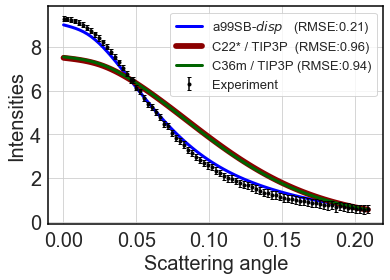

In [21]:
figsize = (6, 4)

plt.figure(figsize=figsize)

plt.plot(qs, intensities_disp, label='a99SB-$\it{disp}$   (RMSE:0.21)', color='blue', linewidth=3.0)
plt.plot(qs,intensities_c22star, label='C22* / TIP3P  (RMSE:0.96)', color='darkred',linewidth=5.8)
plt.plot(qs, intensities_c36m, label='C36m / TIP3P (RMSE:0.94)', color='darkgreen',linewidth=3.0)
#plt.scatter(qs, intensities_exp, label= 'experiment', color='black', marker='.', s=70)
plt.errorbar(qs, intensities_exp, yerr=errs, fmt = '.', color='black', label='Experiment', capsize=2)
plt.xlabel('Scattering angle', fontsize=20)
plt.ylabel('Intensities', fontsize=20)
xticks = qss
#plt.yscale('log')
plt.xticks(ticks=xticks)
plt.tick_params(labelsize=20)
plt.legend(loc='upper right', fontsize=13)
# plt.title('SAXS profiles from unbiased MD', fontsize=20, pad=20)
plt.savefig(outdir+'/unbiased_SAXS_err.pdf', bbox_inches='tight', dpi=1600)

In [24]:
def scatter_with_constant_error(x, y, error):
    """
    Make a scatter plot with a constant error band around y.
    Parameters
    ----------
    x : array-like
        The x-coordinates.
    y : array-like
        The y-coordinates.
    error : float
        The constant error to add/subtract from y.
    """
    x = np.asarray(x)
    y = np.asarray(y)
    plt.figure()
    plt.scatter(x, y, label='Data points', s=0.1, color='red')
    plt.fill_between(x, y - error, y + error, alpha=0.3, label='Error band', color='gray')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()


In [25]:
final_disp = {}
for key, values in compdata_disp['SAXS'].items():
    intensities = np.dot(values, weights_disp)
    final_disp[key] = intensities
reweighted_disp = np.asarray(list(final_disp.values()))

final_c22star = {}
for key, values in compdata_c22star['SAXS'].items():
    intensities = np.dot(values, weights_c22star)
    final_c22star[key] = intensities
reweighted_c22star = np.asarray(list(final_c22star.values()))

final_c36m = {}
for key, values in compdata_c36m['SAXS'].items():
    intensities = np.dot(values, weights_c36m)
    final_c36m[key] = intensities
reweighted_c36m = np.asarray(list(final_c36m.values()))

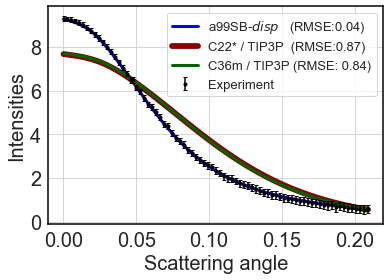

In [26]:
figsize = (6, 4)

plt.figure(figsize=figsize)

plt.plot(qs, reweighted_disp, label='a99SB-$\it{disp}$   (RMSE:0.04)', color='blue',linewidth=3.0)
plt.plot(qs, reweighted_c22star, label='C22* / TIP3P  (RMSE:0.87)', color='darkred', linewidth=5.8)
plt.plot(qs, reweighted_c36m, label='C36m / TIP3P (RMSE: 0.84)', color='darkgreen', linewidth=3.0)
#plt.scatter(qs, intensities_exp, label= 'experiment', color='black', marker='.', s=70)
plt.errorbar(qs, intensities_exp, yerr=errs, fmt = '.', color='black', label='Experiment', capsize=2)
plt.xlabel('Scattering angle', fontsize=20)
plt.ylabel('Intensities', fontsize=20)
xticks = qss
plt.xticks(ticks=xticks)
plt.tick_params(labelsize=20)
plt.legend(loc='upper right', fontsize=13)
# plt.title('SAXS profiles from reweighted MD', fontsize=20, pad=20)
plt.savefig(outdir+'/reweighted_SAXS_err.pdf', bbox_inches='tight', dpi=1600)

In [27]:
from openpyxl import load_workbook

wb = load_workbook('/Users/kaushikborthakur1211/Desktop/Paper_Repo/source_data.xlsx')

ws2 = wb.create_sheet('Fig 3A')


ws2.append(["Q", "I(exp)", "I(disp)", "I(c22)", "I(c36m)", "I(disp_rwt)", "I(c22_rwt)", "I(c36m_rwt)", "Exp-errors"])

for i in range(len(qs)):
    ws2.append([qs[i], intensities_exp[i],intensities_disp[i], intensities_c22star[i], intensities_c36m[i], reweighted_disp[i], reweighted_c22star[i], reweighted_c36m[i], errs[i]])
    
wb.save('/Users/kaushikborthakur1211/Desktop/Paper_Repo/source_data.xlsx')

In [28]:
import mdtraj as md
import os
import sys
import numpy as np
import scipy as sp
from scipy import optimize
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import math
import itertools
import pandas as pd
from numpy import log2, zeros, mean, var, sum, loadtxt, arange, array, cumsum, dot, transpose, diagonal, floor
from numpy.linalg import inv, lstsq

In [29]:
def block(x):
    d = log2(len(x))
    if (d - floor(d) != 0):
        x = x[:2**int(floor(d))]
    d = int(floor(d))
    n = 2**d
    s, gamma = zeros(d), zeros(d)
    mu = mean(x)
    for i in arange(0,d):
        n = len(x)
        gamma[i] = (n)**(-1)*sum( (x[0:(n-1)]-mu)*(x[1:n]-mu) )
        s[i] = var(x)
        x = 0.5*(x[0::2] + x[1::2])

    M = (cumsum( ((gamma/s)**2*2**arange(1,d+1)[::-1])[::-1] )  )[::-1]
    q =array([6.634897,  9.210340,  11.344867, 13.276704, 15.086272,
              16.811894, 18.475307, 20.090235, 21.665994, 23.209251,
              24.724970, 26.216967, 27.688250, 29.141238, 30.577914,
              31.999927, 33.408664, 34.805306, 36.190869, 37.566235,
              38.932173, 40.289360, 41.638398, 42.979820, 44.314105,
              45.641683, 46.962942, 48.278236, 49.587884, 50.892181])
    for k in arange(0,d):
        if(M[k] < q[k]):
            break
    if (k >= d-1):
        print("Warning: Use more data")

    return (s[k]/2**(d-k))

In [30]:
prot_res_renum = array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71])

In [31]:
dsspH_disp = np.loadtxt('/Users/kaushikborthakur1211/Desktop/Paper_Repo/PaaA2/a99SBdisp/reweight_trial/ensembles/dssp.H.dat')
dsspE_disp = np.loadtxt('/Users/kaushikborthakur1211/Desktop/Paper_Repo/PaaA2/a99SBdisp/reweight_trial/ensembles/dssp.E.dat')

dsspH_c22star = np.loadtxt('/Users/kaushikborthakur1211/Desktop/Paper_Repo/PaaA2/c22star-TIP3P/reweight_trial/ensembles/dssp.H.dat')
dsspE_c22star = np.loadtxt('/Users/kaushikborthakur1211/Desktop/Paper_Repo/PaaA2/c22star-TIP3P/reweight_trial/ensembles/dssp.E.dat')

dsspH_c36m = np.loadtxt('/Users/kaushikborthakur1211/Desktop/Paper_Repo/PaaA2/Charmm36m/reweight_trial/ensembles/dssp.H.dat')
dsspE_c36m = np.loadtxt('/Users/kaushikborthakur1211/Desktop/Paper_Repo/PaaA2/Charmm36m/reweight_trial/ensembles/dssp.E.dat')

In [32]:
Hprop_disp = np.sum(dsspH_disp, axis=0).astype(float)/len(dsspH_disp)
Hprop_c22star = np.sum(dsspH_c22star, axis=0).astype(float)/len(dsspH_c22star)
Hprop_c36m = np.sum(dsspH_c36m, axis=0).astype(float)/len(dsspH_c36m)


Eprop_disp = np.sum(dsspE_disp,axis=0).astype(float)/len(dsspE_disp)
Eprop_c22star = np.sum(dsspE_c22star, axis=0).astype(float)/len(dsspE_c22star)
Eprop_c36m = np.sum(dsspE_c36m, axis=0).astype(float)/len(dsspE_c36m)

In [33]:
reweight_Hprop_disp=[]
reweight_Eprop_disp=[]
for i in range(0,len(Hprop_disp)):
    reweight_Hprop_disp.append(np.dot(dsspH_disp[:,i],weights_disp))
    reweight_Eprop_disp.append(np.dot(dsspE_disp[:,i],weights_disp))


reweight_Hprop_c22star=[]
reweight_Eprop_c22star=[]
for i in range(0,len(Hprop_c22star)):
    reweight_Hprop_c22star.append(np.dot(dsspH_c22star[:,i],weights_c22star))
    reweight_Eprop_c22star.append(np.dot(dsspE_c22star[:,i],weights_c22star))

reweight_Hprop_c36m=[]
reweight_Eprop_c36m=[]
for i in range(0,len(Hprop_c36m)):
    reweight_Hprop_c36m.append(np.dot(dsspH_c36m[:,i],weights_c36m))
    reweight_Eprop_c36m.append(np.dot(dsspE_c36m[:,i],weights_c36m))

In [34]:
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5

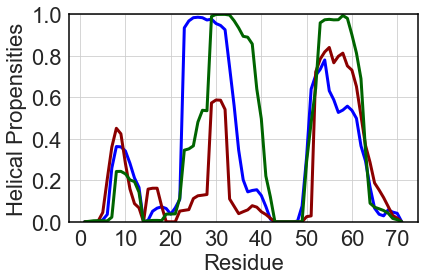

In [35]:
figsize = (6, 4)

plt.figure(figsize=figsize)


plt.plot(prot_res_renum, Hprop_disp, color='blue', label='a99SB-disp', linewidth=3.0)
plt.plot(prot_res_renum, Hprop_c22star, color='darkred', label='c22*/TIP3P', linewidth=3.0)
plt.plot(prot_res_renum, Hprop_c36m, color='darkgreen', label='C36m/TIP3P', linewidth=3.0)
plt.ylim(0,1.0)
plt.xlabel('Residue', size=22)
plt.ylabel('Helical Propensities', size=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.tight_layout()
# plt.legend(loc='center left', bbox_to_anchor= (1.0, 0.85), fontsize=15)
# plt.title(r"$\alpha$ helix Content from Unbiased MD", fontsize=22, pad=20)
plt.savefig(outdir+'/helix_comparison.pdf', bbox_inches='tight')

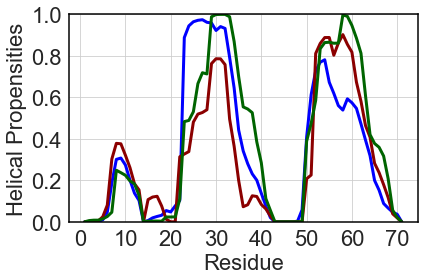

In [36]:
figsize = (6, 4)

plt.figure(figsize=figsize)


plt.plot(prot_res_renum, reweight_Hprop_disp, color='blue', label='a99SB-disp', linewidth=3.0)
plt.plot(prot_res_renum, reweight_Hprop_c22star, color='darkred', label='c22*/TIP3P', linewidth=3.0)
plt.plot(prot_res_renum, reweight_Hprop_c36m, color='darkgreen', label='C36m/TIP3P', linewidth=3.0)
plt.ylim(0,1.0)
plt.xlabel('Residue', size=22)
plt.ylabel('Helical Propensities', size=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.tight_layout()
# plt.legend(loc='center left', bbox_to_anchor= (1.0, 0.85), fontsize=15)
# plt.title(r"$\alpha$ helix Content from Reweighted MD", fontsize=22, pad=20)
plt.savefig(outdir+'/reweighted_helix_comparison.pdf', bbox_inches='tight')

In [37]:
wb = load_workbook('/Users/kaushikborthakur1211/Desktop/Paper_Repo/source_data.xlsx')

ws1 = wb.create_sheet('Fig 3B')


ws1.append(["residue", "helix_disp", "helix_c22", "helix_c36m", "helix_disp_rwt", "helix_c22_rwt", "helix_c36m_rwt"])

for i in range(len(prot_res_renum)):
    ws1.append([prot_res_renum[i], Hprop_disp[i], Hprop_c22star[i], Hprop_c36m[i], reweight_Hprop_disp[i], reweight_Hprop_c22star[i], reweight_Hprop_c36m[i]])
    
wb.save('/Users/kaushikborthakur1211/Desktop/Paper_Repo/source_data.xlsx')

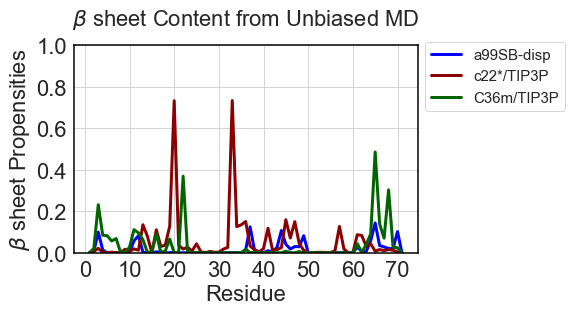

In [38]:
plt.plot(prot_res_renum, Eprop_disp, color='blue', label='a99SB-disp', linewidth=3.0)
plt.plot(prot_res_renum, Eprop_c22star, color='darkred', label='c22*/TIP3P', linewidth=3.0)
plt.plot(prot_res_renum, Eprop_c36m, color='darkgreen', label='C36m/TIP3P', linewidth=3.0)
plt.ylim(0,1.0)
plt.xlabel('Residue', size=22)
plt.ylabel(r'$\beta$ sheet Propensities', size=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor= (1.0, 0.85), fontsize=15)
plt.title(r"$\beta$ sheet Content from Unbiased MD", fontsize=22, pad=20)
plt.savefig(outdir+'/sheet_comparison.pdf',bbox_inches='tight')

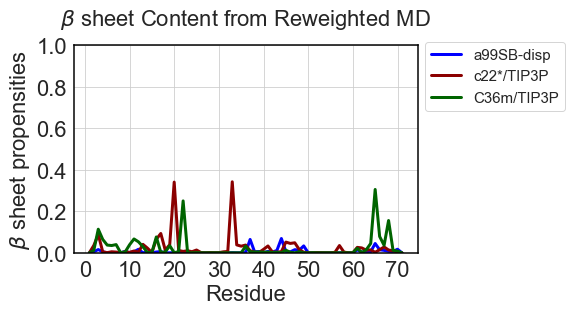

In [39]:
plt.plot(prot_res_renum, reweight_Eprop_disp, color='blue', label='a99SB-disp', linewidth=3.0)
plt.plot(prot_res_renum, reweight_Eprop_c22star, color='darkred', label='c22*/TIP3P', linewidth=3.0)
plt.plot(prot_res_renum, reweight_Eprop_c36m, color='darkgreen', label='C36m/TIP3P', linewidth=3.0)
plt.ylim(0,1.0)
plt.xlabel('Residue', size=22)
plt.ylabel(r'$\beta$ sheet propensities', size=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor= (1.0, 0.85), fontsize=15)
plt.title(r"$\beta$ sheet Content from Reweighted MD", fontsize=22, pad=20)
plt.savefig(outdir+'/reweighted_sheet_comparison.pdf',bbox_inches='tight')

In [40]:
wb = load_workbook('/Users/kaushikborthakur1211/Desktop/Paper_Repo/source_data.xlsx')

ws1 = wb.create_sheet('SI Fig 17')


ws1.append(["residue", "sheet_disp", "sheet_c22", "sheet_c36m", "sheet_disp_rwt", "sheet_c22_rwt", "sheet_c36m_rwt"])

for i in range(len(prot_res_renum)):
    ws1.append([prot_res_renum[i], Eprop_disp[i], Eprop_c22star[i], Eprop_c36m[i], reweight_Eprop_disp[i], reweight_Eprop_c22star[i], reweight_Eprop_c36m[i]])
    
wb.save('/Users/kaushikborthakur1211/Desktop/Paper_Repo/source_data.xlsx')

In [41]:
index = ['CA', 'CB','HA','H','N','C','RDC', 'SAXS']

In [42]:
dispUB = [0.66, 0.42, 0.11, 0.17, 0.98, 0.64, 0.74, 0.21]
dfc_disp_UB = pd.DataFrame(data=dispUB, index=index, columns=['Unbiased \n a99SBdisp']).T

In [43]:
dispR = [0.58, 0.39, 0.10, 0.15, 0.84, 0.56, 0.66, 0.04]
dfc_disp_R = pd.DataFrame(data=dispR, index=index, columns=['Reweighted \n a99SBdisp']).T

In [44]:
c36R = [0.48, 0.40, 0.11, 0.09, 0.67, 0.38, 0.44, 0.84]
dfc_c36_R = pd.DataFrame(data=c36R, index=index, columns=['Reweighted \n C36m/TIP3P']).T

In [45]:
c22R = [0.54, 0.44, 0.12, 0.19, 1.14, 0.54, 0.66, 0.87]
dfc_c22_R = pd.DataFrame(data=c22R, index=index, columns=['Reweighted \n c22*/TIP3P']).T

In [46]:
table = pd.concat([dfc_disp_UB, dfc_disp_R,dfc_c22_R, dfc_c36_R]).round(2)
table_new = table.rename(columns={'CA': r'C$\alpha$', 'CB': r'C$\beta$', 'HA': r'H$\alpha$'})
table_new['Average']= np.average((table_new/(table_new.iloc[0])),axis=1).round(2)

In [47]:
import matplotlib
import seaborn as sns
def plot_mat(df:"pandas dataframe",title,unit,cbarlabel,textsize,textcolor,cmap, filename,fig_dims:tuple=(40,40),
            epsilon = 0):
        """mat = square matrix
        unit = string specifying the units"""
        #ratio = emat/mat
        mat = df.to_numpy()
        ratio = mat/mat[0,:]
        divnorm=matplotlib.colors.TwoSlopeNorm(vmin=0, vcenter=1., vmax=2)
        fig,ax = plt.subplots(1,figsize=fig_dims)
        s = sns.heatmap(pd.DataFrame(ratio,index=df.index, columns = df.columns),linewidths=1,
                        linecolor='black', cmap=cmap,norm=divnorm,ax=ax,cbar_kws={'label': cbarlabel,'aspect':15})
        s.figure.axes[-1].set_ylabel(cbarlabel, size = 60)
        for i in range(len(mat)):
            for j in range(mat.shape[1]):
                c = mat[i,j]
                ax.text(j+.5,i+.5,f"{np.round(c,3)}{unit}",
                        va='center', ha='center', color = textcolor,size=textsize,weight="bold")
        #ax.figure.axes[-1].yaxis.label.set_size( 40)
        cax = plt.gcf().axes[-1]
        cax.tick_params(labelsize=70)
        ax.tick_params(labelsize=70,top=True)
        ax.tick_params(axis="y",rotation=0)
        ax.tick_params(axis="x",rotation=30)
        #ax.figure.axes[-1].yaxis.label.set_size(25)
        #ax.set_title(title, size = 25)
        ax.xaxis.tick_top()
        #ax.grid(b=True,which='minor',color='black', linestyle='-', linewidth=1, alpha=0.2)
        plt.minorticks_on()
        figpath = os.path.join(outdir, filename)
        for _, spine in ax.spines.items():
            spine.set_visible(True)
            spine.set_linewidth(5)

        for _, spine in cax.spines.items():
            spine.set_visible(True)
            spine.set_linewidth(7)

        plt.savefig(figpath, bbox_inches='tight')
        plt.show()
        return

In [48]:
filename='ff_scores.pdf'

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from scipy.signal import find_peaks
import sys 
import random
import scipy as sp
from scipy import optimize
from scipy.optimize import least_squares
from scipy.special import erf
from time import time
import matplotlib.pyplot as plt
from matplotlib import colors
import os
from os.path import join, exists
from platform import uname
from datetime import datetime
import matplotlib.patheffects as pe
from configparser import ConfigParser

In [50]:
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5

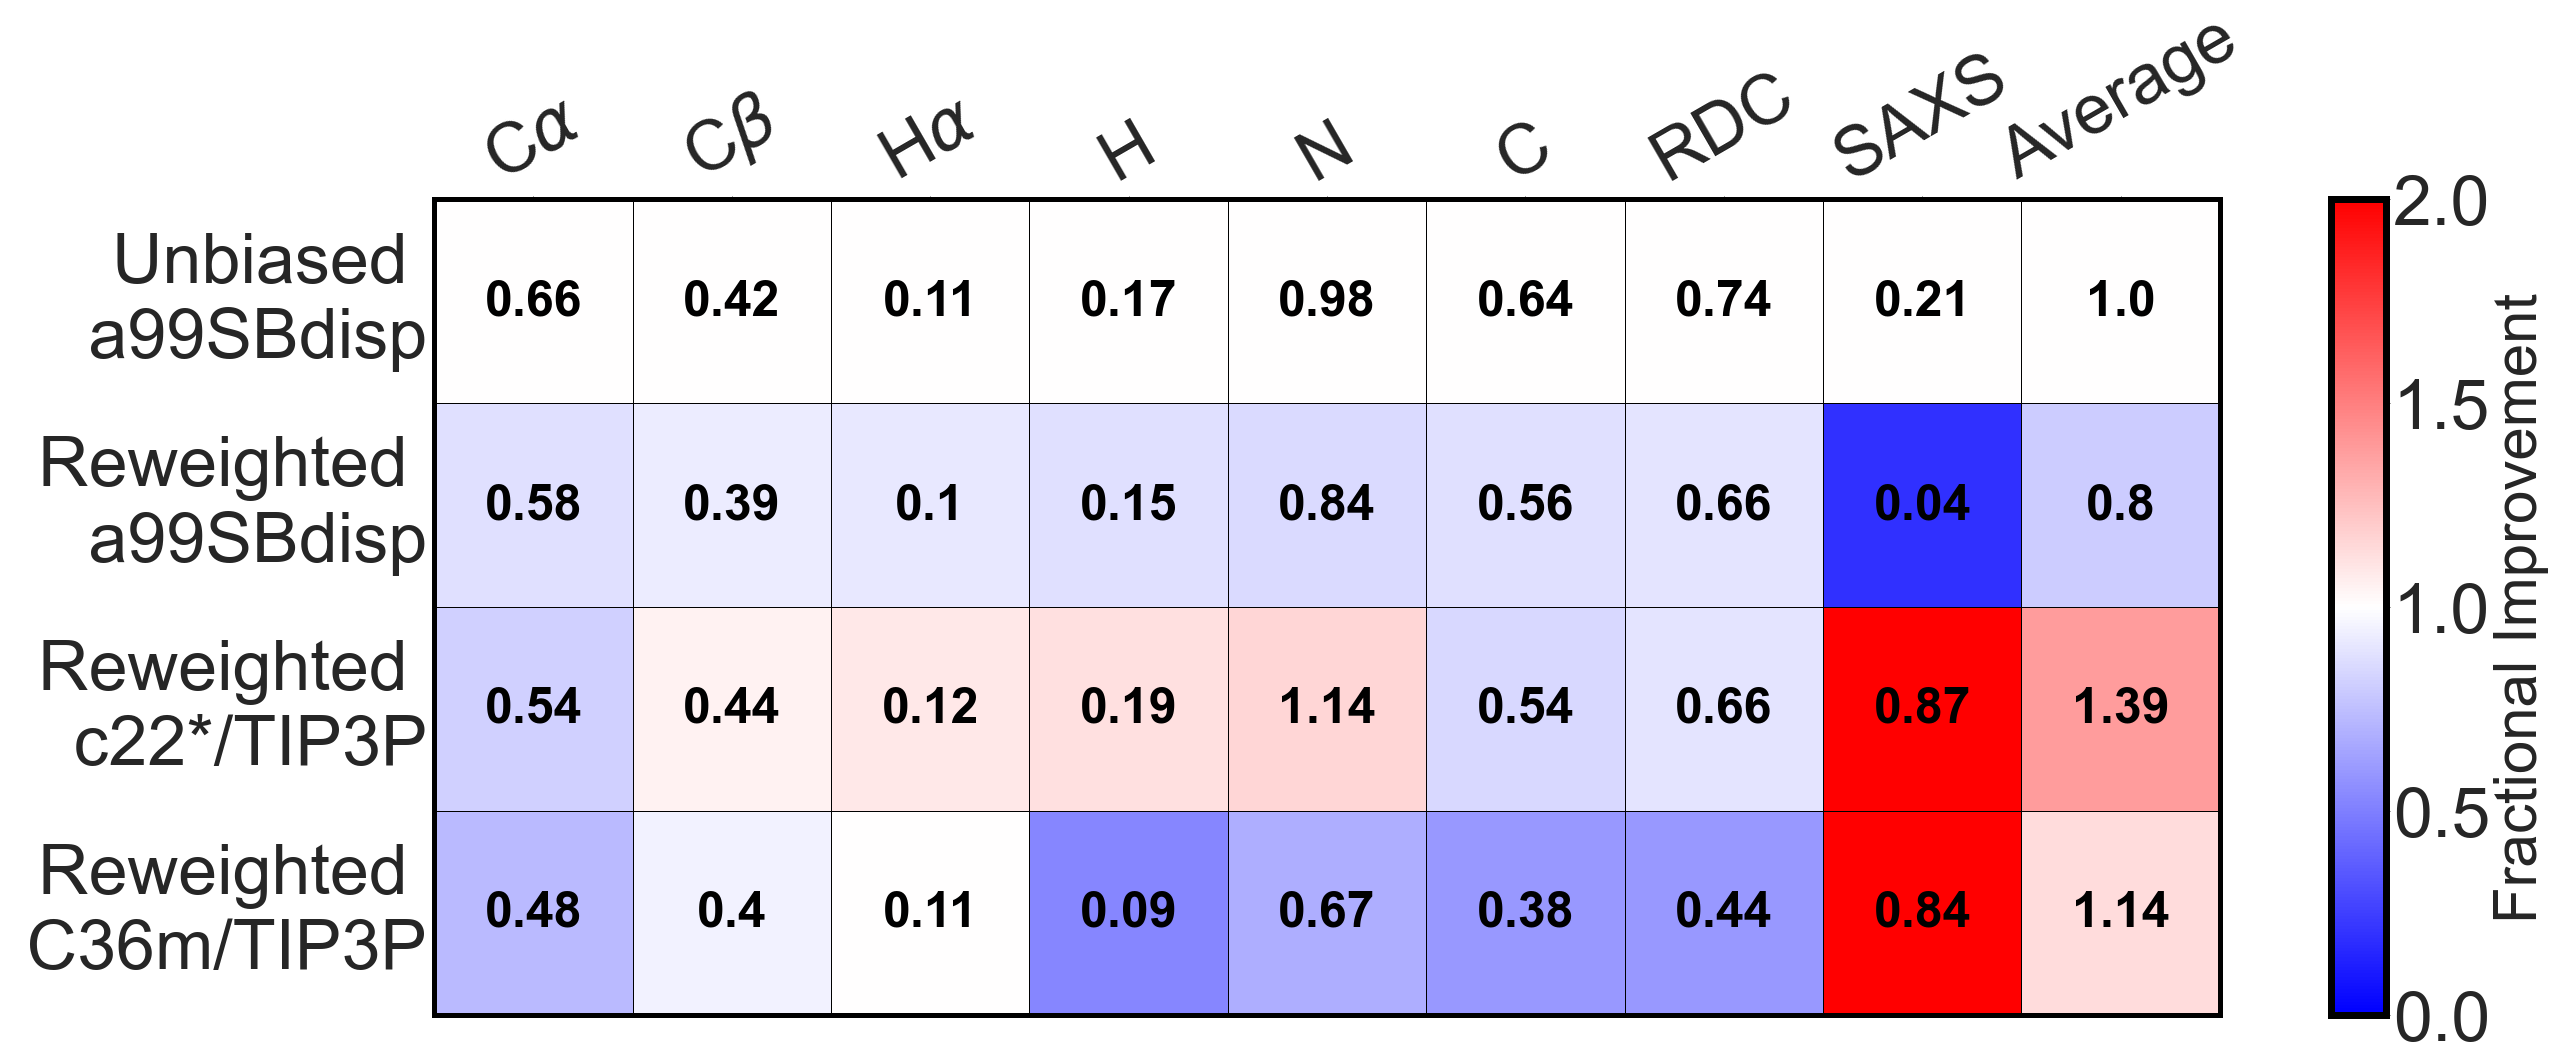

In [51]:
plot_mat(table_new," ", "","Fractional Improvement",50,"black","bwr",filename, fig_dims = (40,15))